In [1]:
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from fastai.vision.all import *
from fastai.vision import *
import wandb
from fastai.callback.wandb import *
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install -qqq wandb
!pip install -qqqU fastai

In [3]:
#wandb.login() wandb helps to plot various graphs and metrics

# **PREPROCESSING PART BEGINS**

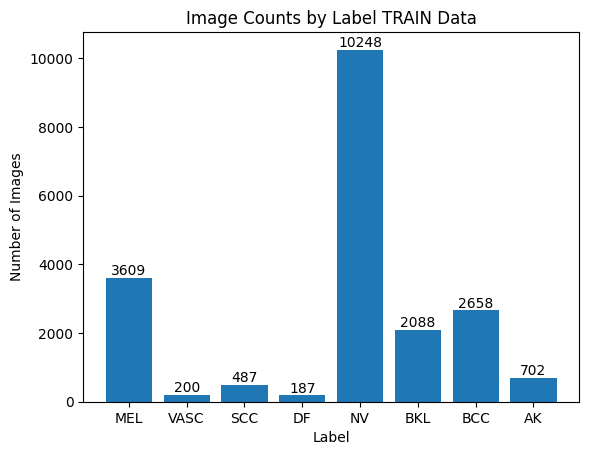

In [4]:
import os
import matplotlib.pyplot as plt

# Define the path to the output directory
output_dir = '/kaggle/input/isic2019-dataset/data/train'

label_list = ['AK', 'DF', 'MEL', 'NV', 'VASC', 'BCC', 'BKL', 'SCC']

# Get a list of the label directories that match the label list
label_dirs = [os.path.join(output_dir, d) for d in os.listdir(output_dir) if
              os.path.isdir(os.path.join(output_dir, d)) and d in label_list]

# Iterate over the label directories and count the number of images in each directory
counts = []
labels = []
for label_dir in label_dirs:
    num_images = len(os.listdir(label_dir))
    counts.append(num_images)
    labels.append(os.path.basename(label_dir))

# Create a bar chart of the image counts by label
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Image Counts by Label TRAIN Data')

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


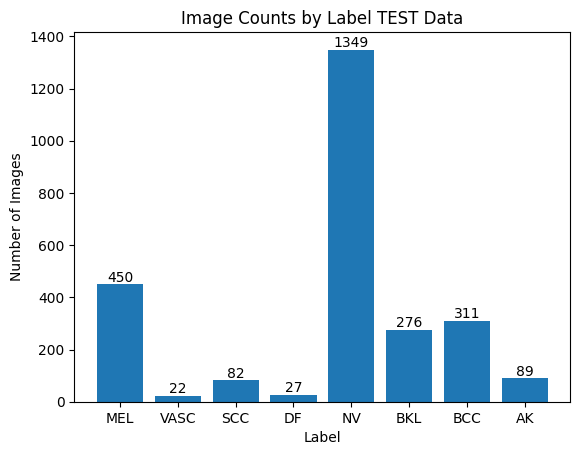

In [5]:
import os
import matplotlib.pyplot as plt

# Define the path to the output directory
output_dir = '/kaggle/input/isic2019-dataset/data/test'

label_list = ['AK', 'DF', 'MEL', 'NV', 'VASC', 'BCC', 'BKL', 'SCC']

# Get a list of the label directories that match the label list
label_dirs = [os.path.join(output_dir, d) for d in os.listdir(output_dir) if
              os.path.isdir(os.path.join(output_dir, d)) and d in label_list]

# Iterate over the label directories and count the number of images in each directory
counts = []
labels = []
for label_dir in label_dirs:
    num_images = len(os.listdir(label_dir))
    counts.append(num_images)
    labels.append(os.path.basename(label_dir))

# Create a bar chart of the image counts by label
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Image Counts by Label TEST Data')

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [6]:
os.mkdir('/kaggle/working/test')
os.mkdir('/kaggle/working/train')

In [7]:
""" TRAINING DATA """
# Ask the user for the source directories to be copied
src_dir1 = '/kaggle/input/isic2019-dataset/data/train/MEL'
src_dir2 = '/kaggle/input/isic2019-dataset/data/train/BCC'

# Ask the user for the destination path where the directories will be pasted
dest_dir = '/kaggle/working/train'

# Combine the source directories with their parent path to get the full path
src_path1 = os.path.join(os.getcwd(), src_dir1)
src_path2 = os.path.join(os.getcwd(), src_dir2)

# Copy the directories to the destination directory
for src_path in [src_path1, src_path2]:
    dest_subdir = os.path.join(dest_dir, os.path.basename(src_path))
    shutil.copytree(src_path, dest_subdir)

In [8]:
""" TEST DATA """
# Ask the user for the source directories to be copied
src_dir1 = '/kaggle/input/isic2019-dataset/data/test/MEL'
src_dir2 = '/kaggle/input/isic2019-dataset/data/test/BCC'

# Ask the user for the destination path where the directories will be pasted
dest_dir = '/kaggle/working/test'

# Combine the source directories with their parent path to get the full path
src_path1 = os.path.join(os.getcwd(), src_dir1)
src_path2 = os.path.join(os.getcwd(), src_dir2)

# Copy the directories to the destination directory
for src_path in [src_path1, src_path2]:
    dest_subdir = os.path.join(dest_dir, os.path.basename(src_path))
    shutil.copytree(src_path, dest_subdir)

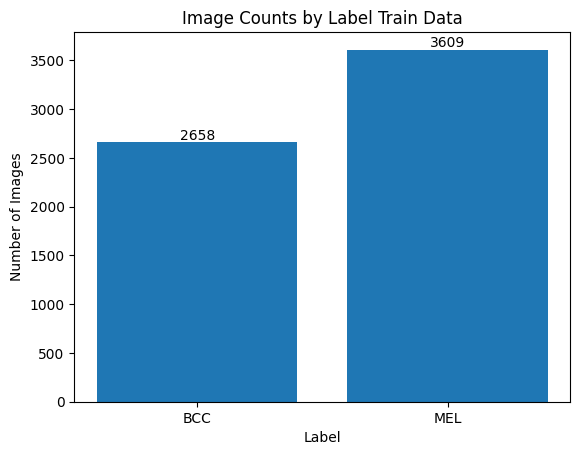

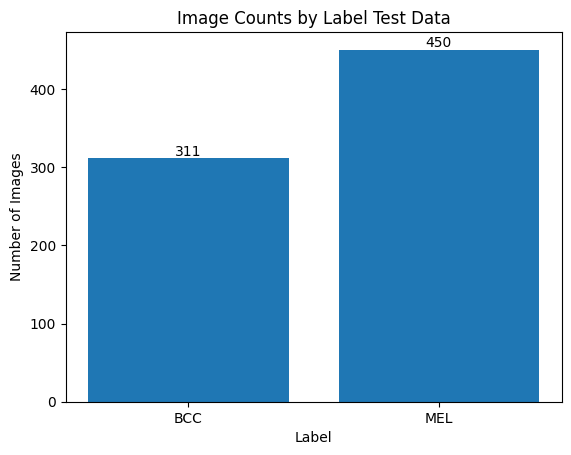

In [9]:
# Define the path to the output directory
output_dir = '/kaggle/working/train'

label_list = ['MEL','BCC']

# Get a list of the label directories that match the label list
label_dirs = [os.path.join(output_dir, d) for d in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, d)) and d in label_list]

# Iterate over the label directories and count the number of images in each directory
counts = []
labels = []
for label_dir in label_dirs:
    num_images = len(os.listdir(label_dir))
    counts.append(num_images)
    labels.append(os.path.basename(label_dir))

# Create a bar chart of the image counts by label
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Image Counts by Label Train Data')


# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

output_dir = '/kaggle/working/test'

label_list = [ 'MEL', 'BCC']

# Get a list of the label directories that match the label list
label_dirs = [os.path.join(output_dir, d) for d in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, d)) and d in label_list]

# Iterate over the label directories and count the number of images in each directory
counts = []
labels = []
for label_dir in label_dirs:
    num_images = len(os.listdir(label_dir))
    counts.append(num_images)
    labels.append(os.path.basename(label_dir))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Image Counts by Label Test Data')

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [10]:
DATASET_PATH = '/kaggle/working/train'

In [11]:
class_names = [ 'MEL', 'BCC']
print(class_names)

['MEL', 'BCC']


In [12]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)


In [13]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)
df.tail()

,name,label
6262,/kaggle/working/train/BCC/ISIC_0033257.jpg,1
6263,/kaggle/working/train/BCC/ISIC_0066318.jpg,1
6264,/kaggle/working/train/BCC/ISIC_0067812.jpg,1
6265,/kaggle/working/train/BCC/ISIC_0055567.jpg,1
6266,/kaggle/working/train/BCC/ISIC_0032415.jpg,1


# **TRAINING PART BEGINS**

In [14]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=32,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

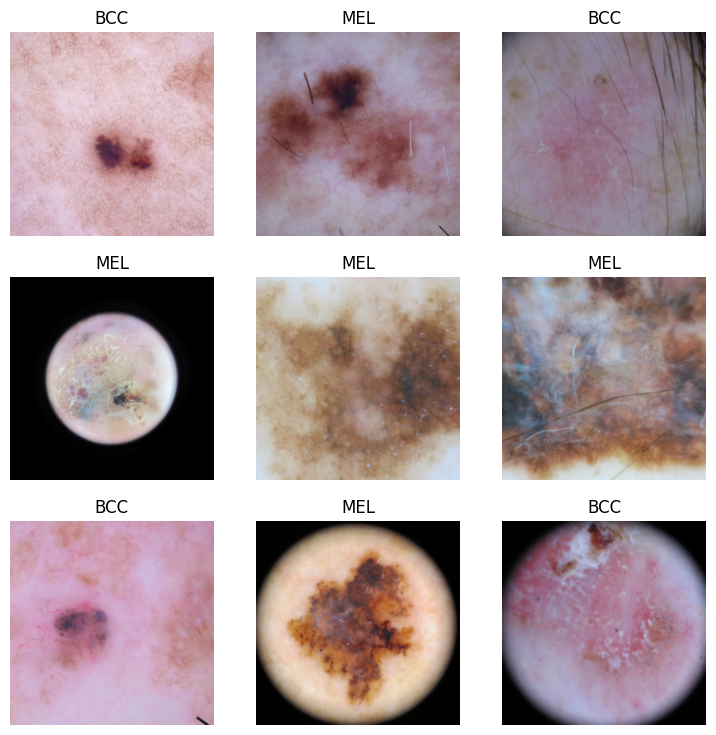

In [15]:
dls.show_batch()

In [16]:
model = vision_learner(
    dls=dls,
    arch=models.resnet152,
    metrics=[accuracy, error_rate, Precision(), Recall(), F1Score()]
)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:03<00:00, 77.9MB/s]


In [17]:
model.fine_tune(
    epochs=30,
    base_lr = 0.0012
)

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.603351,0.310617,0.874701,0.125299,0.889675,0.888418,0.889046,02:00


epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.303921,0.180142,0.924182,0.075818,0.931083,0.935028,0.933051,02:01
1,0.159897,0.176592,0.934557,0.065443,0.943343,0.940678,0.942008,02:03
2,0.094158,0.196144,0.929769,0.070231,0.930556,0.946328,0.938375,02:01
3,0.100353,0.209255,0.936153,0.063847,0.924324,0.966102,0.944751,02:02
4,0.099453,0.187913,0.944932,0.055068,0.951909,0.950565,0.951237,02:00
5,0.111243,0.160809,0.943336,0.056664,0.935705,0.966102,0.950660,01:59
6,0.069597,0.170455,0.944932,0.055068,0.925433,0.981638,0.952707,02:01
7,0.085868,0.271568,0.916999,0.083001,0.887179,0.977401,0.930108,02:00
8,0.066257,0.201244,0.946528,0.053472,0.949509,0.956215,0.952850,02:00
9,0.055563,0.205396,0.939346,0.060654,0.940111,0.953390,0.946704,01:58


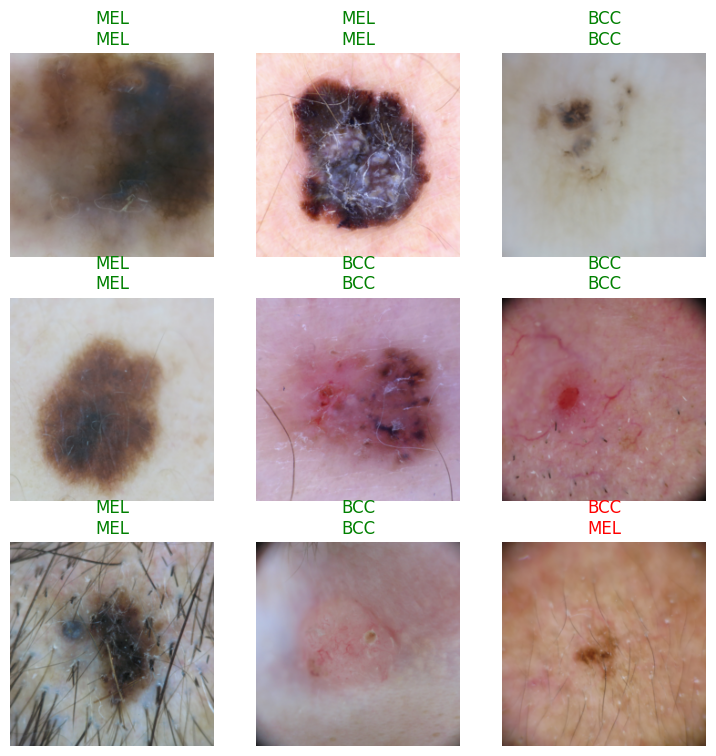

In [18]:
model.show_results()

In [19]:
model.export('/kaggle/working/skinlesion_resnet152_only_two.pkl')

# **TESTING PART BEGINS**

In [20]:
# Set the path to the images directory
images_dir = "/kaggle/working/test"

# Initialize the list of image paths
image_paths = []

# Initialize the lists for storing the predicted probabilities and true labels
scores = []
y_true = []
x = []
y = []

# Iterate over all subdirectories in the images directory
for filefolder in os.listdir(images_dir):
    # Check if the current file is a directory
    if os.path.isdir(os.path.join(images_dir, filefolder)):
        # Iterate over all files in the current subdirectory
        for filename in os.listdir(os.path.join(images_dir, filefolder)):
            # Check if the current file is an image file
            if filename.endswith(".jpg"):
                # Add the full path of the current file to the list of image paths
                image_paths.append(os.path.join(images_dir, filefolder, filename))

                # Call the predict method on the current image
                label, _, probs = model.predict(os.path.join(images_dir, filefolder, filename))
                prob_bcc, prob_mel = probs
                print(f'predicted = {label} ; prob_bcc = {prob_bcc:.4f}, prob_mel = {prob_mel:.4f} , true = {filefolder}')
                x.append(label)
                y.append(filefolder)
                # Append the predicted probabilities and true label to the corresponding lists
                scores.append(prob_mel)
                y_true.append(1 if filefolder == 'MEL' else 0) # assign 1 to melanoma (MEL) and 0 to basal cell carcinoma (BCC)

predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 0.9974, prob_mel = 0.0026 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0004, prob_mel = 0.9996 , true = BCC


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9965, prob_mel = 0.0035 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9997, prob_mel = 0.0003 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9953, prob_mel = 0.0047 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0007, prob_mel = 0.9993 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9233, prob_mel = 0.0767 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9986, prob_mel = 0.0014 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9981, prob_mel = 0.0019 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 0.9997, prob_mel = 0.0003 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9721, prob_mel = 0.0279 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9987, prob_mel = 0.0013 , true = BCC


predicted = BCC ; prob_bcc = 0.9996, prob_mel = 0.0004 , true = BCC


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9127, prob_mel = 0.0873 , true = BCC


predicted = BCC ; prob_bcc = 0.9944, prob_mel = 0.0056 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9994, prob_mel = 0.0006 , true = BCC


predicted = BCC ; prob_bcc = 0.9780, prob_mel = 0.0220 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0112, prob_mel = 0.9888 , true = BCC


predicted = BCC ; prob_bcc = 0.9838, prob_mel = 0.0162 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9822, prob_mel = 0.0178 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9767, prob_mel = 0.0233 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9071, prob_mel = 0.0929 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9990, prob_mel = 0.0010 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.7359, prob_mel = 0.2641 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9948, prob_mel = 0.0052 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0004, prob_mel = 0.9996 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9997, prob_mel = 0.0003 , true = BCC


predicted = BCC ; prob_bcc = 0.9995, prob_mel = 0.0005 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = MEL ; prob_bcc = 0.0149, prob_mel = 0.9851 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9989, prob_mel = 0.0011 , true = BCC


predicted = BCC ; prob_bcc = 0.9790, prob_mel = 0.0210 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9955, prob_mel = 0.0045 , true = BCC


predicted = BCC ; prob_bcc = 0.9993, prob_mel = 0.0007 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9989, prob_mel = 0.0011 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.6800, prob_mel = 0.3200 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9972, prob_mel = 0.0028 , true = BCC


predicted = BCC ; prob_bcc = 0.9995, prob_mel = 0.0005 , true = BCC


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = BCC


predicted = BCC ; prob_bcc = 0.9932, prob_mel = 0.0068 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9927, prob_mel = 0.0073 , true = BCC


predicted = BCC ; prob_bcc = 0.9998, prob_mel = 0.0002 , true = BCC


predicted = BCC ; prob_bcc = 0.9749, prob_mel = 0.0251 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9983, prob_mel = 0.0017 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9996, prob_mel = 0.0004 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.7562, prob_mel = 0.2438 , true = BCC


predicted = MEL ; prob_bcc = 0.0159, prob_mel = 0.9841 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = BCC


predicted = BCC ; prob_bcc = 0.9999, prob_mel = 0.0001 , true = BCC


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0399, prob_mel = 0.9601 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.4401, prob_mel = 0.5599 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0009, prob_mel = 0.9991 , true = MEL


predicted = MEL ; prob_bcc = 0.0074, prob_mel = 0.9926 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0038, prob_mel = 0.9962 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0383, prob_mel = 0.9617 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0057, prob_mel = 0.9943 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0005, prob_mel = 0.9995 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0005, prob_mel = 0.9995 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0035, prob_mel = 0.9965 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0007, prob_mel = 0.9993 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0004, prob_mel = 0.9996 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0004, prob_mel = 0.9996 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0008, prob_mel = 0.9992 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0008, prob_mel = 0.9992 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.9818, prob_mel = 0.0182 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0012, prob_mel = 0.9988 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.7997, prob_mel = 0.2003 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.1626, prob_mel = 0.8374 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0008, prob_mel = 0.9992 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0979, prob_mel = 0.9021 , true = MEL


predicted = BCC ; prob_bcc = 0.9900, prob_mel = 0.0100 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.5901, prob_mel = 0.4099 , true = MEL


predicted = MEL ; prob_bcc = 0.0004, prob_mel = 0.9996 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0007, prob_mel = 0.9993 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0004, prob_mel = 0.9996 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0005, prob_mel = 0.9995 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0909, prob_mel = 0.9091 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.9282, prob_mel = 0.0718 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0040, prob_mel = 0.9960 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.1605, prob_mel = 0.8395 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = MEL


predicted = MEL ; prob_bcc = 0.0914, prob_mel = 0.9086 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0183, prob_mel = 0.9817 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0011, prob_mel = 0.9989 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0035, prob_mel = 0.9965 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0849, prob_mel = 0.9151 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0023, prob_mel = 0.9977 , true = MEL


predicted = MEL ; prob_bcc = 0.0018, prob_mel = 0.9982 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0005, prob_mel = 0.9995 , true = MEL


predicted = MEL ; prob_bcc = 0.0022, prob_mel = 0.9978 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0019, prob_mel = 0.9981 , true = MEL


predicted = MEL ; prob_bcc = 0.0006, prob_mel = 0.9994 , true = MEL


predicted = MEL ; prob_bcc = 0.0060, prob_mel = 0.9940 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0009, prob_mel = 0.9991 , true = MEL


predicted = MEL ; prob_bcc = 0.0015, prob_mel = 0.9985 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.1561, prob_mel = 0.8439 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0015, prob_mel = 0.9985 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0034, prob_mel = 0.9966 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0190, prob_mel = 0.9810 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 1.0000, prob_mel = 0.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0080, prob_mel = 0.9920 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.8918, prob_mel = 0.1082 , true = MEL


predicted = MEL ; prob_bcc = 0.0007, prob_mel = 0.9993 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0005, prob_mel = 0.9995 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.8879, prob_mel = 0.1121 , true = MEL


predicted = MEL ; prob_bcc = 0.0539, prob_mel = 0.9461 , true = MEL


predicted = BCC ; prob_bcc = 0.5517, prob_mel = 0.4483 , true = MEL


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0022, prob_mel = 0.9978 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.9623, prob_mel = 0.0377 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.1109, prob_mel = 0.8891 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.6438, prob_mel = 0.3562 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.2012, prob_mel = 0.7988 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0003, prob_mel = 0.9997 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0007, prob_mel = 0.9993 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0010, prob_mel = 0.9990 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0022, prob_mel = 0.9978 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = BCC ; prob_bcc = 0.7197, prob_mel = 0.2803 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0125, prob_mel = 0.9875 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = BCC ; prob_bcc = 0.5573, prob_mel = 0.4427 , true = MEL


predicted = MEL ; prob_bcc = 0.0001, prob_mel = 0.9999 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.1908, prob_mel = 0.8092 , true = MEL


predicted = MEL ; prob_bcc = 0.0002, prob_mel = 0.9998 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


predicted = MEL ; prob_bcc = 0.0000, prob_mel = 1.0000 , true = MEL


[0.         0.00321543 0.00321543 0.00321543 0.00321543 0.00321543
 0.00321543 0.00321543 0.00321543 0.00321543 0.00321543 0.00321543
 0.00321543 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087 0.00643087
 0.00643087 0.0096463  0.0096463  0.0096463  0.01286174 0.01286174
 0.01607717 0.01607717 0.0192926  0.0192926  0.02250804 0.02250804
 0.02572347 0.02572347 0.02893891 0.02893891 0.03536977 0.03536977
 0.03858521 0.03858521 0.04501608 0.04501608 0.05466238 0.05466238
 0.07073955 0.07073955 0.07717042 0.07717042 0.27974277 0.27974277
 0.33440514 0.33440514 0.43086817 0.43086817 0.51125402 0.5112

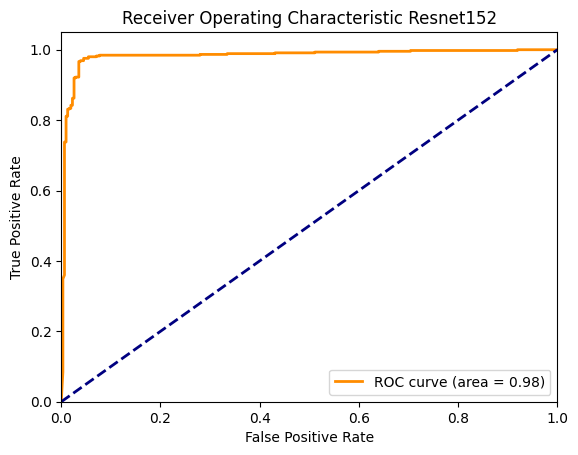

In [21]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, scores)

# Calculate the area under the ROC curve (AUC)
print(fpr)
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Resnet152')
plt.legend(loc="lower right")
plt.savefig('roc_curve_resnet152.png')
plt.show()


In [22]:
fpr, tpr, thresholds = roc_curve(y_true, scores)

# Calculate confusion matrix
cm = confusion_matrix(y_true, np.where(scores >= thresholds[1], 1, 0))

# Extract metrics from confusion matrix
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

# Calculate Accuracy, TNR, and FNR
accuracy = (tp + tn) / (tp + tn + fp + fn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"TNR: {tnr:.4f}")
print(f"FNR: {fnr:.4f}")

# Print FPR, TPR, and threshold values
for fpr_val, tpr_val, threshold in zip(fpr, tpr, thresholds):
    print(f"FPR: {fpr_val:.4f}, TPR: {tpr_val:.4f}, Threshold: {threshold:.4f}")

Accuracy: 0.4573
TNR: 0.9968
FNR: 0.9156
FPR: 0.0000, TPR: 0.0000, Threshold: 2.0000
FPR: 0.0032, TPR: 0.0844, Threshold: 1.0000
FPR: 0.0032, TPR: 0.1378, Threshold: 1.0000
FPR: 0.0032, TPR: 0.1711, Threshold: 1.0000
FPR: 0.0032, TPR: 0.1978, Threshold: 1.0000
FPR: 0.0032, TPR: 0.2222, Threshold: 1.0000
FPR: 0.0032, TPR: 0.2489, Threshold: 1.0000
FPR: 0.0032, TPR: 0.2711, Threshold: 1.0000
FPR: 0.0032, TPR: 0.3156, Threshold: 1.0000
FPR: 0.0032, TPR: 0.3244, Threshold: 1.0000
FPR: 0.0032, TPR: 0.3311, Threshold: 1.0000
FPR: 0.0032, TPR: 0.3422, Threshold: 1.0000
FPR: 0.0032, TPR: 0.3489, Threshold: 1.0000
FPR: 0.0064, TPR: 0.3600, Threshold: 1.0000
FPR: 0.0064, TPR: 0.3689, Threshold: 1.0000
FPR: 0.0064, TPR: 0.3756, Threshold: 1.0000
FPR: 0.0064, TPR: 0.3844, Threshold: 1.0000
FPR: 0.0064, TPR: 0.4111, Threshold: 1.0000
FPR: 0.0064, TPR: 0.4133, Threshold: 1.0000
FPR: 0.0064, TPR: 0.4200, Threshold: 1.0000
FPR: 0.0064, TPR: 0.4244, Threshold: 1.0000
FPR: 0.0064, TPR: 0.4356, Threshold

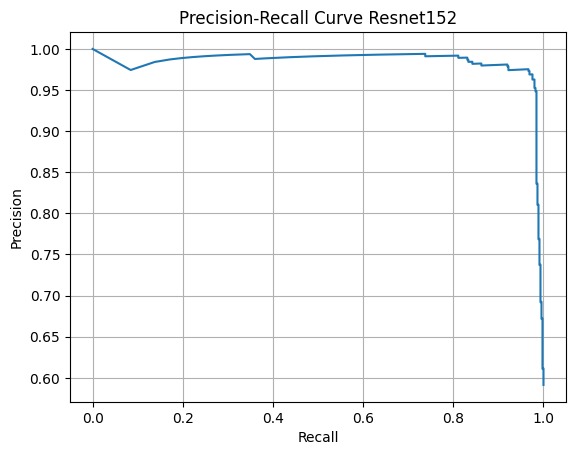

In [23]:
# Assuming you have the true labels in y_true and the predicted scores in scores

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_true, scores)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Resnet152')
plt.grid(True)
plt.savefig('precision_recall_curve_resnet152.png')
plt.show()

In [24]:
#class_names = new_model.dls.vocab
class_names = ['MEL','BCC']
print(class_names)
label_names = ['MEL','BCC']

['MEL', 'BCC']


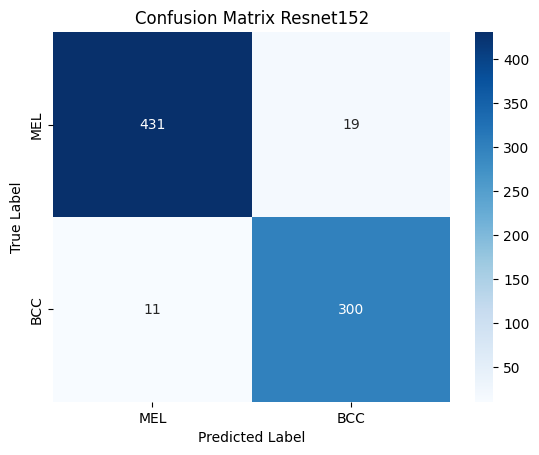

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y, x, labels=label_names)

# Create heatmap with label names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names , fmt='d')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Resnet152')
#save image
plt.savefig('confusion_matrix_resnet152.png')
# Show plot
plt.show()


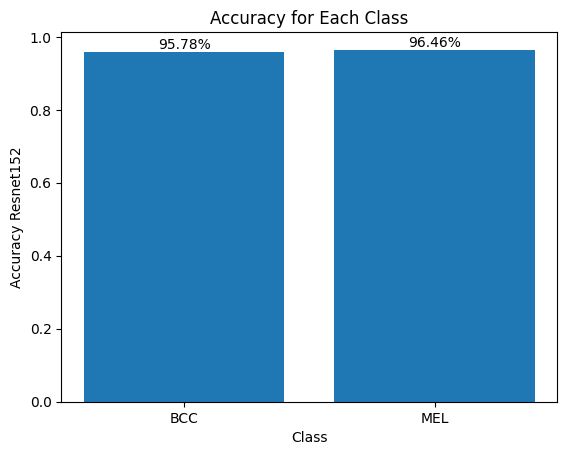

Accuracy: 96.06%


In [26]:
# Example true and predicted labels
y_true = y
y_pred = x

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
accuracy_percentage = accuracy * 100  # Calculate accuracy in percentage

# Calculate confusion matrix
cm = confusion_matrix(y, x, labels=label_names)
label_names = list(set(y))

# Calculate accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Plot bar chart of accuracy for each class
plt.bar(range(len(class_accuracy)), class_accuracy)
plt.xticks(range(len(class_accuracy)), label_names)
plt.xlabel('Class')
plt.ylabel('Accuracy Resnet152')
plt.title('Accuracy for Each Class')

# Add accuracy value as text on top of each bar
for i, acc in enumerate(class_accuracy):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')

plt.savefig('accuracy_resnet152.png')
plt.show()

print(f"Accuracy: {accuracy_percentage:.2f}%")